# Introduction

The dataset, sourced from Kaggle, is analyzed to gain insights into sales performance and customer purchasing patterns. The ultimate goal is to provide data-driven recommendations on which products the company should focus on and to suggest suitable marketing campaigns that align more effectively with market demand.

The dataset consists of 11 columns, each representing an attribute of a product purchase:

* Order ID – A unique identifier for each order placed

* Product – The item that was purchased

* Quantity Ordered – The number of units ordered for that product

* Price Each – The price of a single unit of the product

* Order Date – The date on which the order was placed

* Purchase Address – The shipping address of the order

* Month, Sales, City, Hour – Additional attributes derived from the columns above

To achieve the overall objective, this analysis aims to answer five key business questions:

1.  What was the best month for sales, and how much revenue was generated in that month?

2. Which city had the highest sales volume?

3. At what time of day should advertisements be displayed to maximize the likelihood of purchases?

4. Which products are most frequently sold together?

5. Which product sold the most, and why might it have been the top seller?

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

Step 1: Importing datasets

In [10]:
import pandas as pd
df= pd.read_csv('Sales Data.csv')
print(df)

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each           Order Date  \
0          1700.00  2019-12-30 00:01:00   
1           600.00  2019-

Step 2: Dataset cleaning

Drop NaN values from DataFrame

In [11]:
#Drop NaN values from DataFrame
finaldf= df.dropna()
print(finaldf)

        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each           Order Date  \
0          1700.00  2019-12-30 00:01:00   
1           600.00  2019-

Check the type of columns

In [12]:
#type of columns
print(finaldf.dtypes)

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


Drop Unname column, change the type of columns

In [13]:
#Change the type of columns
finaldf=finaldf.loc[:, ~finaldf.columns.str.contains('^Unnamed')]
print(finaldf.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')


In [14]:
finaldf['Month']=pd.to_datetime(finaldf['Month'])
finaldf['Month']=pd.to_numeric(finaldf['Month'])
print(finaldf.dtypes)

Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


Organize the columns into a table to get a clearer overview.

In [15]:
from IPython.display import display
display(finaldf)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


Step 3: Analyze data

In [16]:
finaldf['Month Name'] = finaldf['Month'].map({
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
})
print(finaldf['Month Name'])

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
185945    Jun
185946    Jun
185947    Jun
185948    Jun
185949    Jun
Name: Month Name, Length: 185950, dtype: object


1. What was the best month for sales?

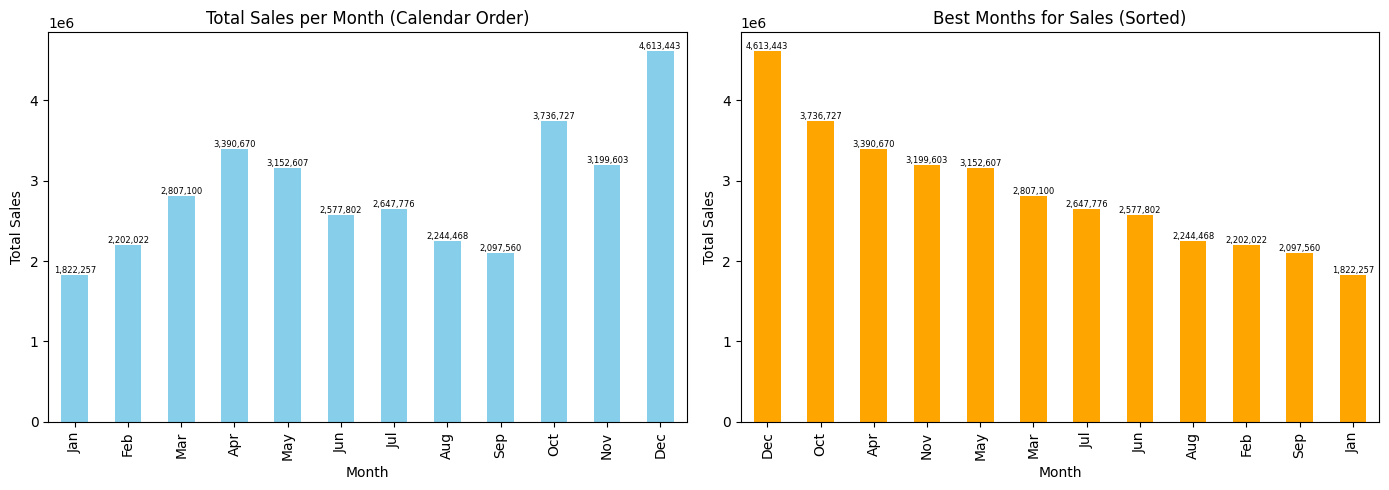

In [20]:
# Group and sum sales by month
monthly_sales = finaldf.groupby('Month Name')['Sales'].sum()

# Ensure months are in calendar order
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_sales = monthly_sales.reindex(month_order)

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Calendar order
monthly_sales.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Total Sales per Month (Calendar Order)')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Sales')
# Add labels on top of bars
for i, value in enumerate(monthly_sales):
    axes[0].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=6)

# Chart 2: Sorted by sales (best to worst)
sorted_sales = monthly_sales.sort_values(ascending=False)
sorted_sales.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Best Months for Sales (Sorted)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Sales')
# Add labels on top of bars
for i, value in enumerate(sorted_sales):
    axes[1].text(i, value, f'{value:,.0f}', ha='center', va='bottom', fontsize=6)

# Adjust layout and show both
plt.tight_layout()
plt.show()



Based on the two bar charts above, the top three months with the highest sales are December, October, and April. We will now analyze the revenue generated during these peak months.

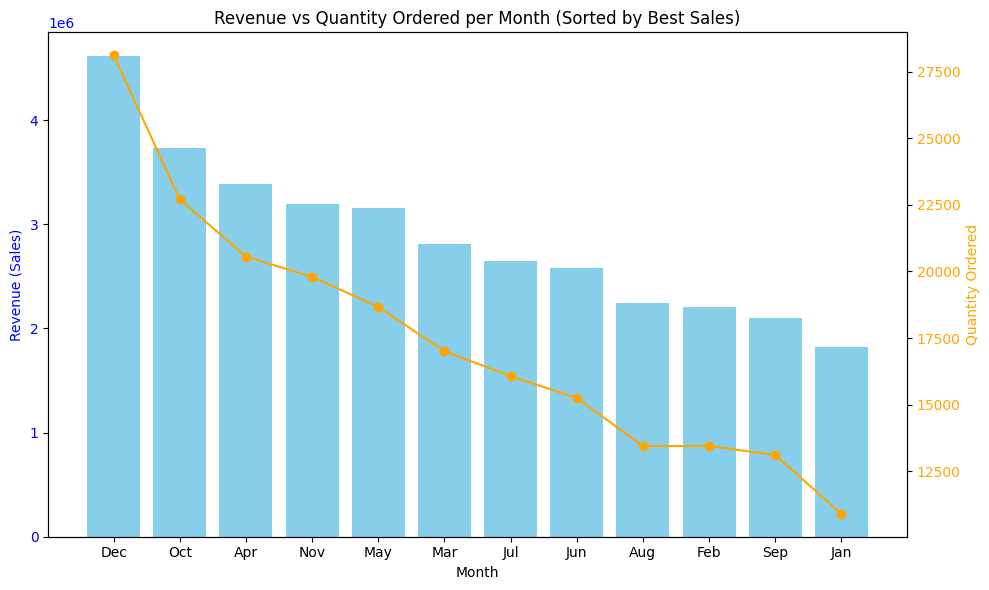

In [21]:
# Group by month and sum Sales and Quantity Ordered
monthly_summary = finaldf.groupby('Month Name').agg({'Sales':'sum', 'Quantity Ordered':'sum'})

# Sort months by sales descending (best months first)
monthly_summary = monthly_summary.sort_values(by='Sales', ascending=False)

# Plot correlation chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot Sales
ax1.bar(monthly_summary.index, monthly_summary['Sales'], color='skyblue', label='Revenue (Sales)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (Sales)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot Quantity Ordered on secondary axis
ax2 = ax1.twinx()
ax2.plot(monthly_summary.index, monthly_summary['Quantity Ordered'], color='orange', marker='o', label='Quantity Ordered')
ax2.set_ylabel('Quantity Ordered', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title
plt.title('Revenue vs Quantity Ordered per Month (Sorted by Best Sales)')
fig.tight_layout()
plt.show()


2. Which city had the highest sales volume?

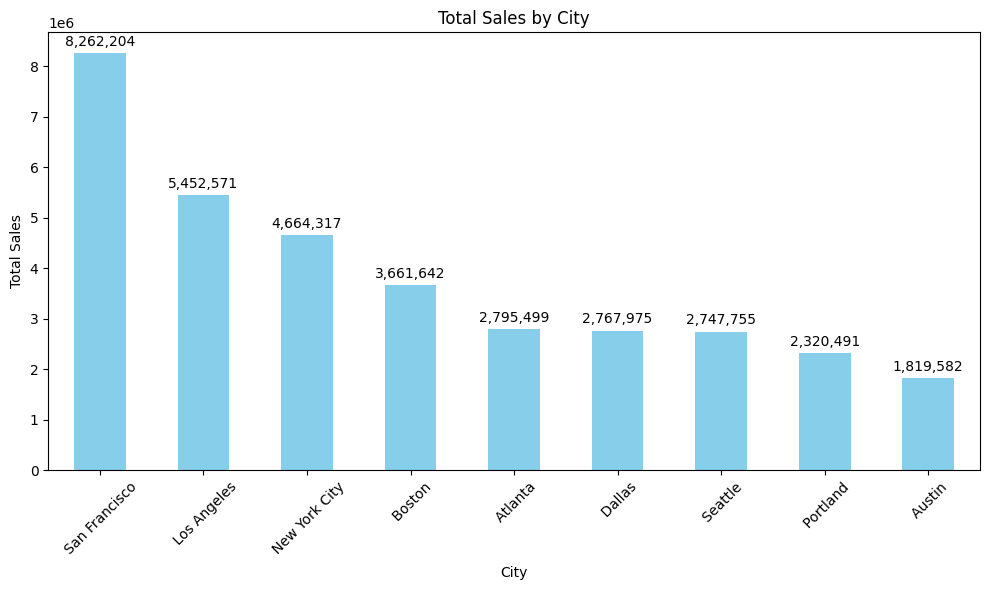

In [23]:
# Group sales by city
city_sales = finaldf.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Plot the sales per city
plt.figure(figsize=(10,6))
bars = city_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Add sales values on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{height:,.0f}',  # format as integer with commas
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0,3),  # offset above the bar
                  textcoords="offset points",
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()


The analysis reveals that San Francisco, Los Angeles, and New York are the top three cities contributing the highest sales volumes.

3. At what time of day should advertisements be displayed to maximize the likelihood of purchases?

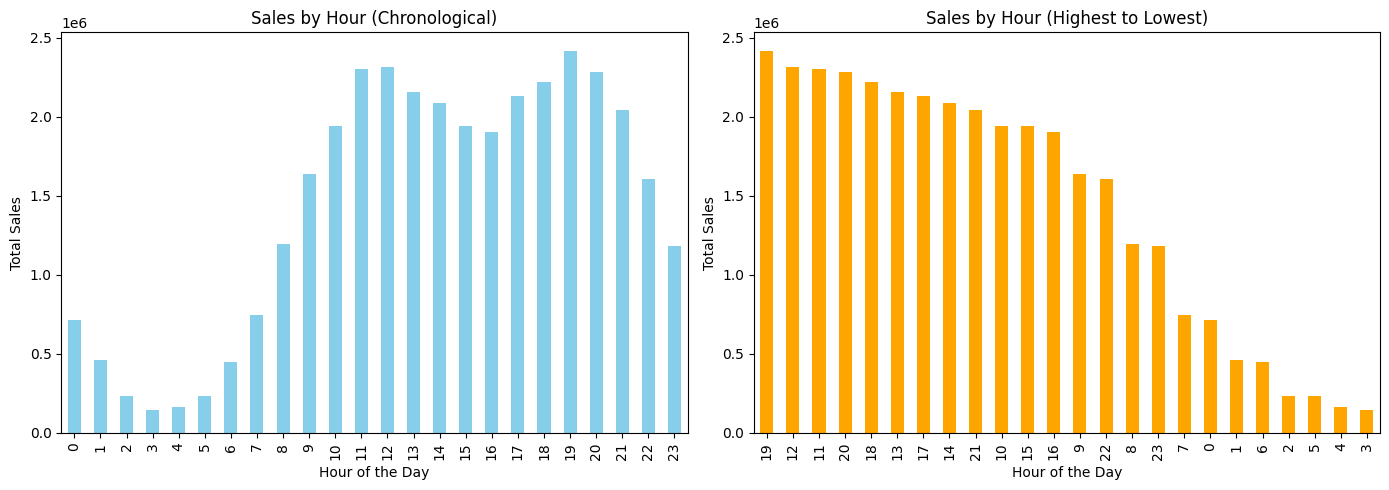

In [25]:
# Group sales by hour
hourly_sales = finaldf.groupby('Hour')['Sales'].sum()

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Sales by hour (chronological order)
hourly_sales.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sales by Hour (Chronological)')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Sales')

# Chart 2: Sales by hour (sorted by sales descending)
hourly_sales.sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Sales by Hour (Highest to Lowest)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Total Sales')

# Adjust layout and show
plt.tight_layout()
plt.show()

Analyzing the relationship between sales and time, it is evident that the lowest sales occur between 11:00 PM and 9:00 AM. Consequently, the period from 10:00 AM to 10:00 PM represents the optimal window for running advertisements to maximize customer engagement and sales potential.

4. Which products are most frequently sold together?

/tmp/ipython-input-1218019274.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates['Grouped'] = df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


                            Product Combination  Count
0            (iPhone, Lightning Charging Cable)   1005
1          (Google Phone, USB-C Charging Cable)    987
2                    (iPhone, Wired Headphones)    447
3              (Google Phone, Wired Headphones)    414
4       (Vareebadd Phone, USB-C Charging Cable)    361
5            (iPhone, Apple Airpods Headphones)    360
6    (Google Phone, Bose SoundSport Headphones)    220
7      (USB-C Charging Cable, Wired Headphones)    160
8           (Vareebadd Phone, Wired Headphones)    143
9  (Lightning Charging Cable, Wired Headphones)     92


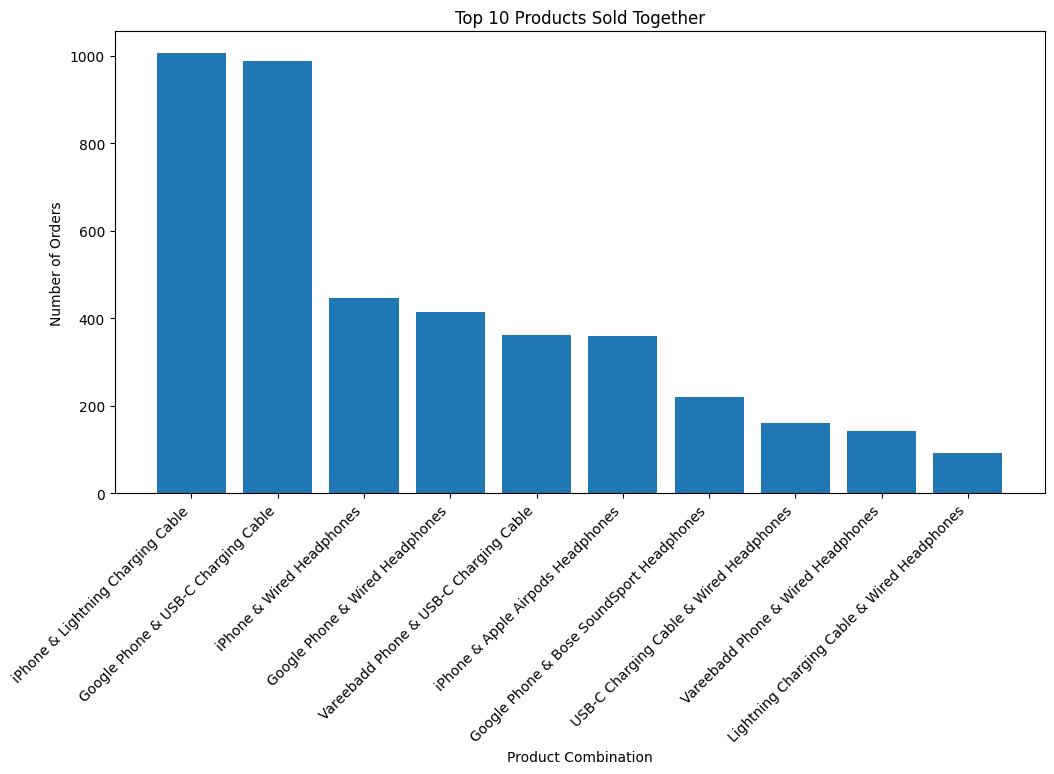

In [26]:
import pandas as pd
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

# Only consider orders with more than 1 product
df_duplicates = finaldf[finaldf.duplicated(['Order ID'], keep=False)]

# Combine products per order
df_duplicates['Grouped'] = df_duplicates.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Keep only one row per order
df_grouped = df_duplicates[['Order ID', 'Grouped']].drop_duplicates()

# Count pairs of products sold together
count = Counter()
for products in df_grouped['Grouped']:
    product_list = products.split(',')
    count.update(Counter(combinations(product_list, 2)))

# Convert to DataFrame for easier visualization
product_combo_df = pd.DataFrame(count.most_common(), columns=['Product Combination', 'Count'])

# Display top 10 most frequently sold together
print(product_combo_df.head(10))

# Optional: plot top 10 combinations
top_10 = product_combo_df.head(10)
plt.figure(figsize=(12,6))
plt.bar(range(len(top_10)), top_10['Count'], tick_label=[f"{a} & {b}" for a,b in top_10['Product Combination']])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Combination')
plt.ylabel('Number of Orders')
plt.title('Top 10 Products Sold Together')
plt.show()


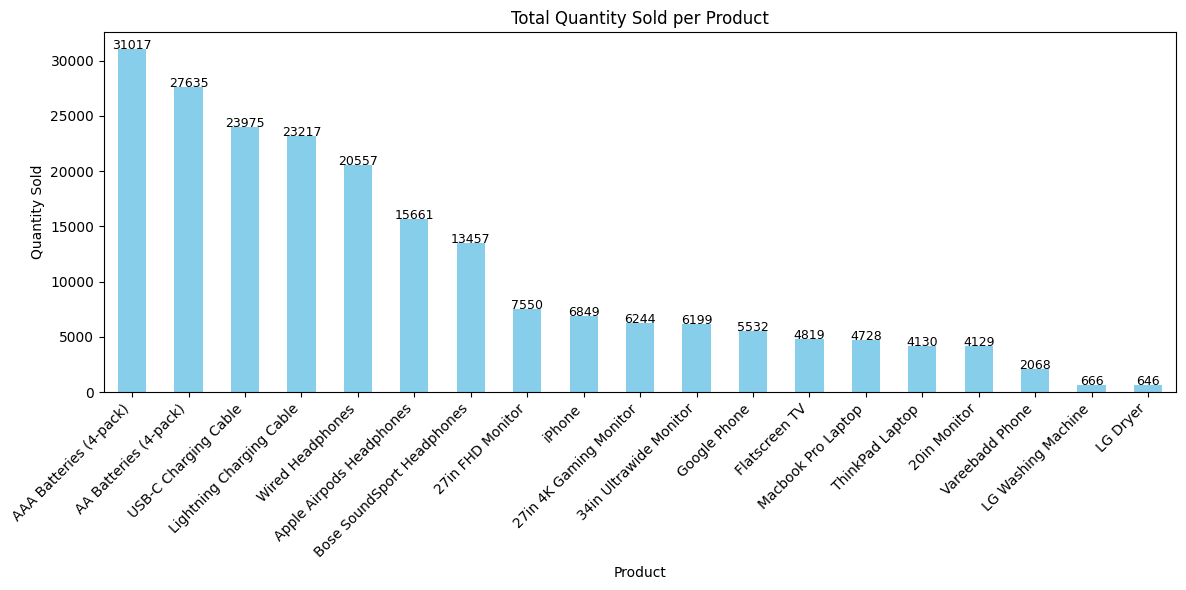

The top-selling product is AAA Batteries (4-pack) with 31017 units sold.


In [27]:
# Group by product and sum the quantity sold
product_sales = finaldf.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# Plot the product sales
plt.figure(figsize=(12,6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Total Quantity Sold per Product')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')

# Add sales numbers on top of bars
for i, v in enumerate(product_sales):
    plt.text(i, v + 5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Display the top product
top_product = product_sales.index[0]
top_quantity = product_sales.iloc[0]
print(f"The top-selling product is {top_product} with {top_quantity} units sold.")

#Conclusion

The sales analysis reveals several key insights:

* Best-performing months: December, October, and April have the highest sales, indicating strong seasonal trends. December likely benefits from year-end shopping, while October and April may align with promotions or product launches.

* Top-performing cities: San Francisco, Los Angeles, and New York contribute the highest sales volumes, suggesting these urban markets have strong demand and purchasing power.

* Optimal advertising times: Sales are lowest between 11:00 PM and 9:00 AM. Therefore, the ideal period for running advertisements is between 10:00 AM and 10:00 PM, maximizing exposure during peak buying hours.

* Products frequently sold together: Pairs like (iPhone, Lightning Charging Cable) and (Google Phone, USB-C Charging Cable) dominate, indicating high demand for accessories bundled with popular smartphones.

* Top-selling products: The highest-selling items are AAA Batteries (4-pack), USB-C Charging Cable, Lightning Charging Cable, and Wired Headphones, highlighting consumer preference for essential electronics and accessories.

#Recommended Strategy to Improve Sales

1. Targeted Promotions for Peak Months:

*  Plan marketing campaigns and promotions during December, October, and April to maximize revenue.

*  Launch special discounts, bundled offers, or limited-time deals to attract customers during these high-sales months.

2. City-focused Marketing:

*  Concentrate advertising and inventory in high-demand cities like San Francisco, Los Angeles, and New York.

*  Consider localized campaigns, pop-up events, or partnerships with regional retailers.

3. Optimize Advertisement Timing:

*  Schedule online and social media ads primarily between 10:00 AM and 10:00 PM when customers are most active.

*  Consider time-based promotions to encourage purchases during off-peak hours.

4. Promote Bundled Products:

*  Highlight accessory bundles that are often purchased together, such as phones with charging cables or headphones with devices.

*  Create “frequently bought together” deals to increase average order value.

5. Stock and Supply Chain Management:

*  Ensure top-selling products like AAA Batteries, USB-C Charging Cables, and Lightning Cables are well-stocked to prevent lost sales.

*  Monitor sales trends for seasonal spikes to optimize inventory and avoid shortages.

6. Upselling and Cross-selling:

*  Recommend complementary products during checkout to increase the likelihood of additional purchases.

*  For example, when a customer buys a phone, suggest compatible accessories in the same order.